In [1]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf

In [2]:
#load the saved model 
json_file = open('NN_108-56-5.json', 'r')
loaded_model_json = json_file.read()
loaded_model = keras.models.model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights("NN_108-56-5_weights.h5")

In [3]:
#load test data
path = 'x:/Steering/Recordings/Processed/'
testX = np.load(path + 'TestX_NN_108-56-5.npy')
testY = np.load(path + 'TestY_NN_108-56-5.npy')
one_hot_test = np.load(path + 'OneHot_testY_108-56-5.npy')

In [4]:
testY

array([2, 2, 5, ..., 4, 3, 5], dtype=int64)

In [5]:
loaded_model.compile(loss='mean_squared_error',
    optimizer='Adam',
           metrics=['categorical_accuracy'])

In [6]:
loaded_model.evaluate(testX,one_hot_test,verbose=1)

194117/194117 [==============================] - 2s 10us/step


[0.053336052134293536, 0.8198612177195176]

In [7]:
#process weights
weights_first_layer = loaded_model.layers[0].get_weights()[0]
biases_first_layer = loaded_model.layers[0].get_weights()[1]

weights_second_layer = loaded_model.layers[1].get_weights()[0]
biases_second_layer = loaded_model.layers[1].get_weights()[1]


In [8]:
weights_first_layer = np.vstack([biases_first_layer, weights_first_layer])
weights_second_layer = np.vstack([biases_second_layer, weights_second_layer])


In [9]:
weights_first_layer_norm = weights_first_layer / abs(weights_first_layer).max()
#biases_first_layer_norm = biases_first_layer / abs(biases_first_layer).max()

weights_second_layer_norm = weights_second_layer / abs(weights_second_layer).max()
#biases_second_layer_norm = biases_second_layer / abs(biases_second_layer).max()


In [10]:
weights_first_layer_norm.shape, weights_second_layer_norm.shape

((109, 56), (57, 5))

In [11]:
abs(weights_first_layer).max(), abs(weights_second_layer).max()

(115.9948, 22.477001)

In [12]:
np.savetxt('weights_first_layer_norm_NN_108-56-5.txt',weights_first_layer_norm,delimiter= ',')
np.savetxt('weights_second_layer_norm_NN_108-56-5.txt',weights_second_layer_norm,delimiter= ',')


In [51]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = confusion_matrix(testY,loaded_model.predict_classes(testX)) 

In [52]:
cfm

array([[    0,     0,     0,     0,     0,     0],
       [18047,   364,     2,  1734,   747,     0],
       [  308, 53345,     5,  1777,   327,     0],
       [    7,    39, 23223,    43,    82,     0],
       [ 1956, 12009,     6, 35379,  5707,     0],
       [  851,  1393,    79,  7532, 29155,     0]], dtype=int64)

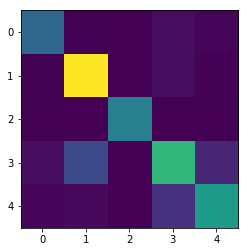

In [53]:
plt.imshow(cfm[1:,:-1])

In [68]:
a = [0 for x in range(5)]
cfm_norm = [[0 for x in range(5)] for y in range(5)]

[0, 0, 0, 0, 0]

In [276]:
for idx in range(5):
    a[idx] = len(testY[testY == idx + 1])  
    
cfm_norm = cfm[1:,0:5] / a[0:5]

In [277]:
cfm_norm, a

(array([[8.63740787e-01, 6.52774291e-03, 8.54920065e-05, 3.14946328e-02,
         1.91489362e-02],
        [1.47410740e-02, 9.56655070e-01, 2.13730016e-04, 3.22756416e-02,
         8.38246603e-03],
        [3.35024409e-04, 6.99401026e-04, 9.92690433e-01, 7.81008773e-04,
         2.10202512e-03],
        [9.36153920e-02, 2.15361716e-01, 2.56476019e-04, 6.42588590e-01,
         1.46295822e-01],
        [4.07293960e-02, 2.49811700e-02, 3.37693426e-03, 1.36803676e-01,
         7.47372469e-01]]), [20894, 55762, 23394, 55057, 39010])

In [278]:
cfm_norm = np.around(cfm_norm,decimals=3)

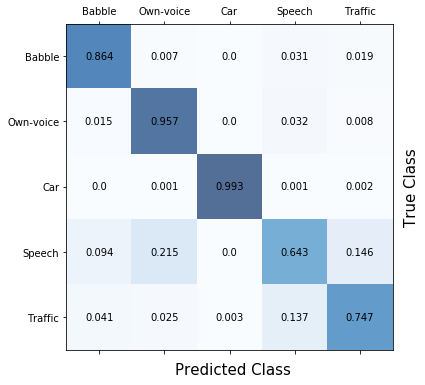

In [279]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center')

ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.set_yticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.yaxis.set_label_coords(1.08,0.5)
ax.xaxis.set_label_coords(0.51,-0.04)
ax.set_xlabel('Predicted Class',fontsize=15)
ax.set_ylabel('True Class',fontsize=15)
plt.show()


In [280]:
fig.savefig('Conf_Matrix_ERB=2.png',dpi=100)

In [261]:
help(plt.xlabel)

Help on function xlabel in module matplotlib.pyplot:

xlabel(s, *args, **kwargs)
    Set the x-axis label of the current axes.
    
    Call signature::
    
        xlabel(label, fontdict=None, labelpad=None, **kwargs)
    
    This is the pyplot equivalent of calling `.set_xlabel` on the current axes.
    See there for a full parameter description.

